# Fracture detection using x-ray



### In this lesson, there are pictures of the arm with or without fractures detected by X-Ray images. We will develop a model to recognize them

<a href='https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images' target=_blank>You can find the data file here</a>

<img src=https://www.researchgate.net/profile/Y-Srinivas/publication/324412731/figure/fig1/AS:946403161415687@1602651505798/Training-Dataset-The-results-obtained-are-presented-below-The-results-are-tested-on-8_Q320.jpg width='400'>

In [2]:
#pip install opencv-python

In [2]:
import cv2
import pandas as pd
import os

In [3]:
labels=['fractured','not fractured']
img_path='train/'

In [4]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):        
        img_list.append(img_path+label+'/'+img_file) 
        label_list.append(label)  

In [5]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
df.sample(5)

,img,label
4556,train/not fractured/49-rotated2-rotated1-rotat...,not fractured
8221,train/not fractured/51-rotated3-rotated1-rotat...,not fractured
5450,train/not fractured/57-rotated3-rotated2-rotat...,not fractured
1183,train/fractured/103-rotated3-rotated2-rotated1...,fractured
6071,train/not fractured/26-rotated1-rotated1-rotat...,not fractured


In [7]:
df.shape

(8863, 2)

In [8]:
d={'fractured':1,'not fractured':0}

In [9]:
df['encode_label']=df['label'].map(d)

In [10]:
df['encode_label'] = df['encode_label'].astype(int)

In [11]:
df.sample(5)

,img,label,encode_label
5355,train/not fractured/67-rotated3-rotated2.jpg,not fractured,0
8770,train/not fractured/28-rotated3-rotated1.jpg,not fractured,0
1217,train/fractured/66-rotated1-rotated2.jpg,fractured,1
3583,train/fractured/109-rotated2-rotated2-rotated1...,fractured,1
7359,train/not fractured/54-rotated3-rotated1-rotat...,not fractured,0


In [12]:
import numpy as np

In [13]:
df['encode_label'].value_counts()

encode_label
1    4480
0    4383
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt

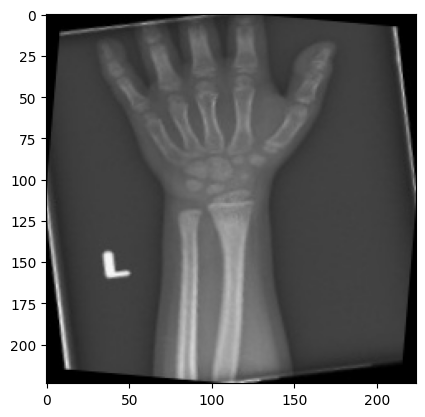

In [15]:
image=cv2.imread(str(df['img'][300]))
plt.imshow(image);

In [16]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(32,32)) 
    img=img/255.0   
    x.append(img)

In [17]:
x=np.array(x)

In [18]:
x

array([[[[0.24705882, 0.24705882, 0.24705882],
         [0.25098039, 0.25098039, 0.25098039],
         [0.25098039, 0.25098039, 0.25098039],
         ...,
         [0.33333333, 0.33333333, 0.33333333],
         [0.2       , 0.2       , 0.2       ],
         [0.2       , 0.2       , 0.2       ]],

        [[0.27058824, 0.27058824, 0.27058824],
         [0.27058824, 0.27058824, 0.27058824],
         [0.25490196, 0.25490196, 0.25490196],
         ...,
         [0.43921569, 0.43921569, 0.43921569],
         [0.21568627, 0.21568627, 0.21568627],
         [0.21176471, 0.21176471, 0.21176471]],

        [[0.26666667, 0.26666667, 0.26666667],
         [0.27058824, 0.27058824, 0.27058824],
         [0.27058824, 0.27058824, 0.27058824],
         ...,
         [0.30196078, 0.30196078, 0.30196078],
         [0.22745098, 0.22745098, 0.22745098],
         [0.22352941, 0.22352941, 0.22352941]],

        ...,

        [[0.28627451, 0.28627451, 0.28627451],
         [0.27843137, 0.27843137, 0.27843137]

In [19]:
y=df['encode_label']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

### CNN Convuliton Neural Networks

In [24]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20,verbose=1)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6339 - loss: 0.6423 - val_accuracy: 0.7766 - val_loss: 0.4694
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7978 - loss: 0.4350 - val_accuracy: 0.7845 - val_loss: 0.4781
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8876 - loss: 0.2854 - val_accuracy: 0.9109 - val_loss: 0.2311
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9369 - loss: 0.1648 - val_accuracy: 0.9408 - val_loss: 0.1572
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9625 - loss: 0.1049 - val_accuracy: 0.9492 - val_loss: 0.1512
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9704 - loss: 0.0794 - val_accuracy: 0.9566 - val_loss: 0.1209
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9802 - loss: 0.0653 - val_accuracy: 0.9571 - val_loss: 0.1260
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.

In [26]:
loss,accuracy=model.evaluate(x_test,y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.0824


In [27]:
accuracy

0.9684151411056519

In [28]:
tahmin=model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [29]:
import matplotlib.pyplot as plt

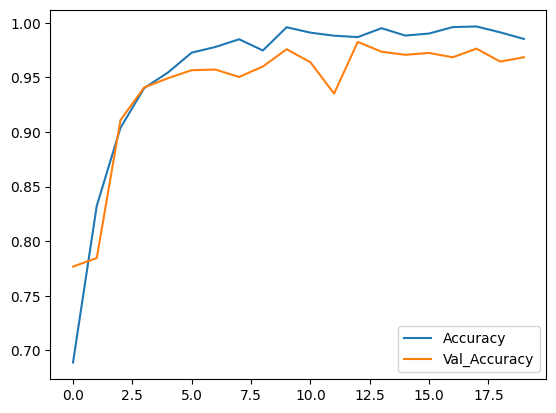

In [30]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

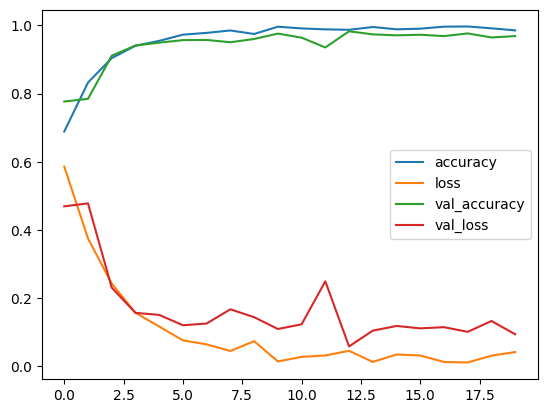

In [31]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [33]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[836,  40],
       [ 16, 881]])

In [34]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [35]:
import seaborn as sns

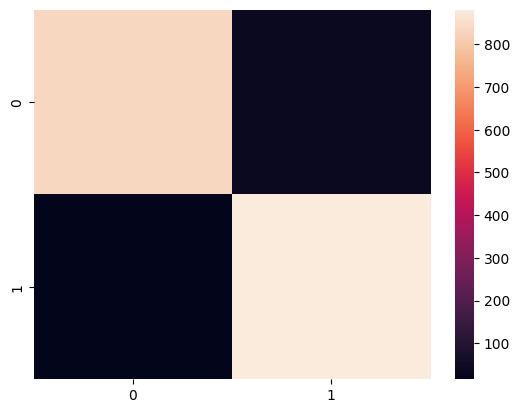

In [36]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [37]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       876
           1       0.96      0.98      0.97       897

    accuracy                           0.97      1773
   macro avg       0.97      0.97      0.97      1773
weighted avg       0.97      0.97      0.97      1773



In [38]:
model.save('model.h5')

# accuracy: 0.9686 - loss: 0.0824

# Using this model, doctors can make decisions faster and more accurately